------
# **PRICIPAL COMPONENT ANALYSIS (PCA)**
-------

### TASK 1: EXPLORATORY DATA ANALYSIS (EDA) :

##### IMPORT LIBRARIES :

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [84]:
from sklearn.cluster import KMeans

In [76]:
from sklearn.metrics import silhouette_score ,davies_bouldin_score

##### IMPORT FILES AND EXPLORE :

In [16]:
df=pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [18]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [20]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

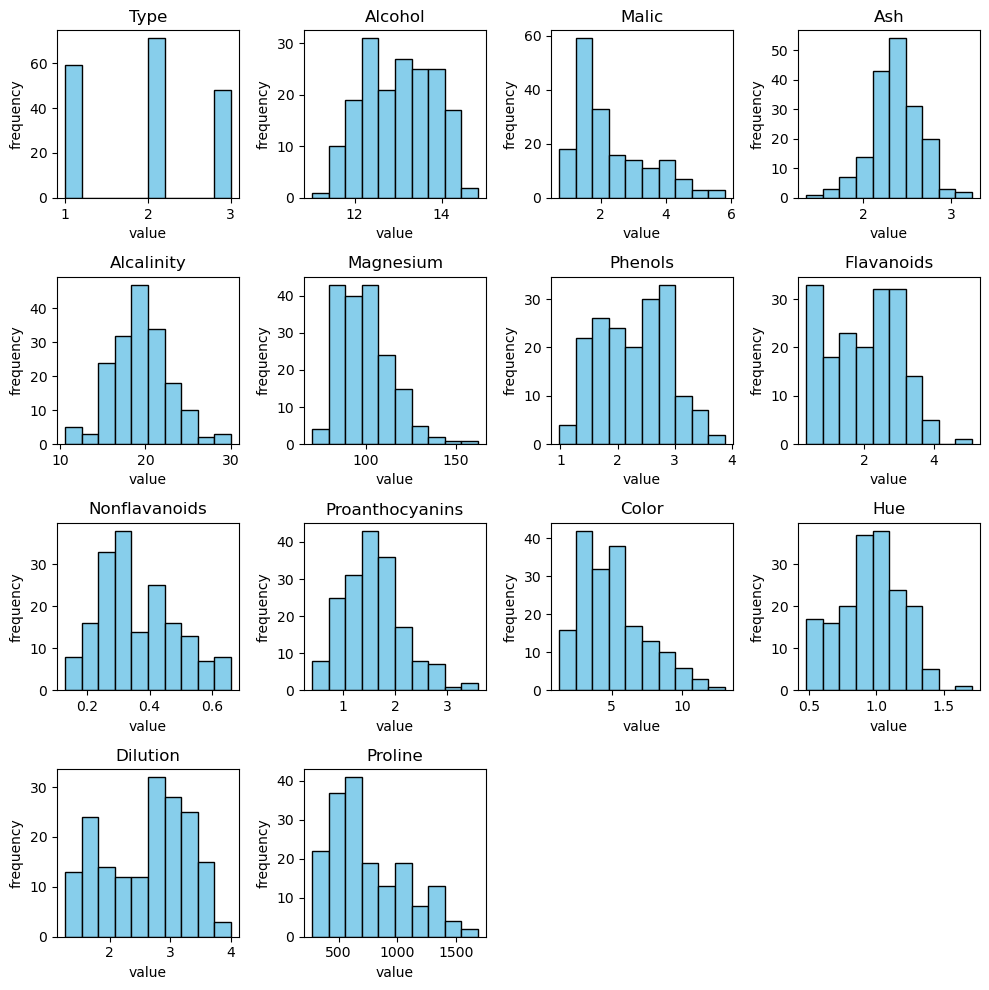

In [28]:
plt.figure(figsize=(10,10))
for i,column in enumerate(df.columns):
    plt.subplot(4,4,i+1)
    plt.hist(df[column] , bins =10 ,color='skyblue',edgecolor='black')
    plt.title(column)
    plt.xlabel('value')
    plt.ylabel('frequency')

plt.tight_layout()
plt.show()

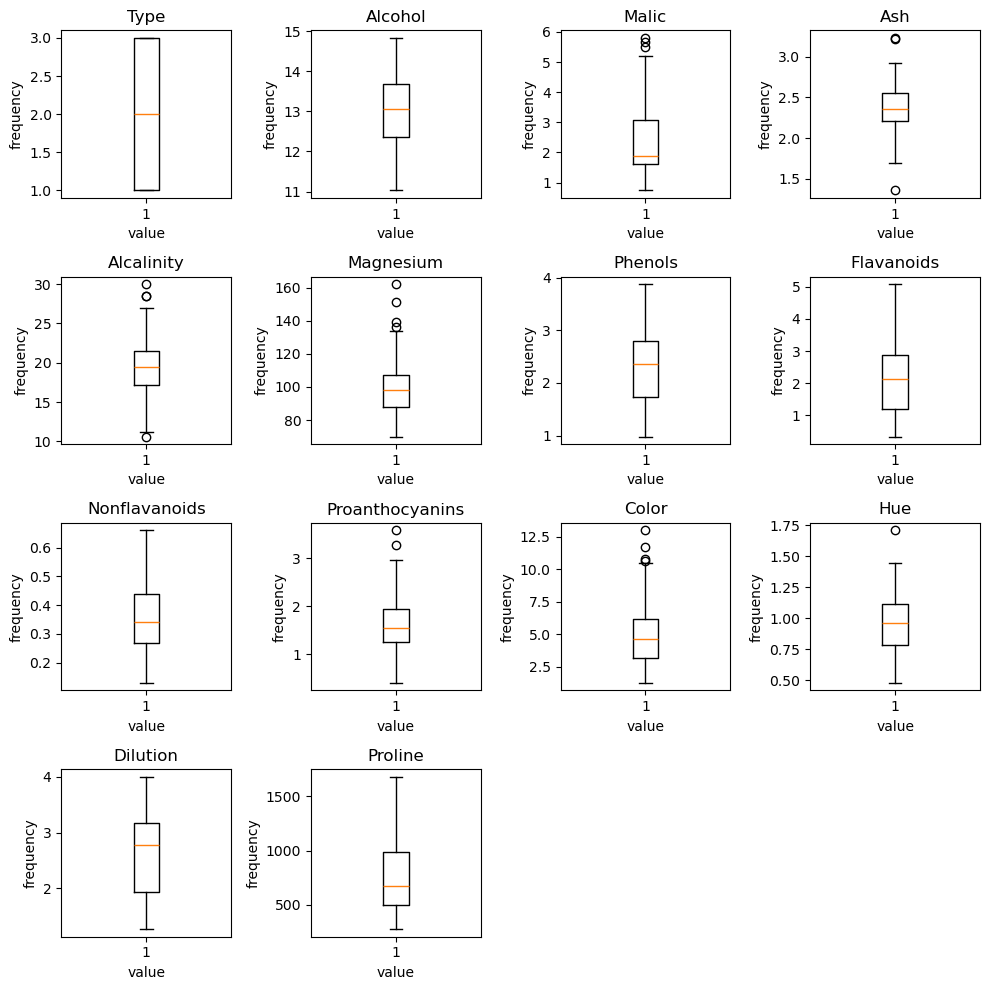

In [34]:
plt.figure(figsize=(10,10))
for i,column in enumerate(df.columns):
    plt.subplot(4,4,i+1)
    plt.boxplot(df[column])
    plt.title(column)
    plt.xlabel('value')
    plt.ylabel('frequency')

plt.tight_layout()
plt.show()

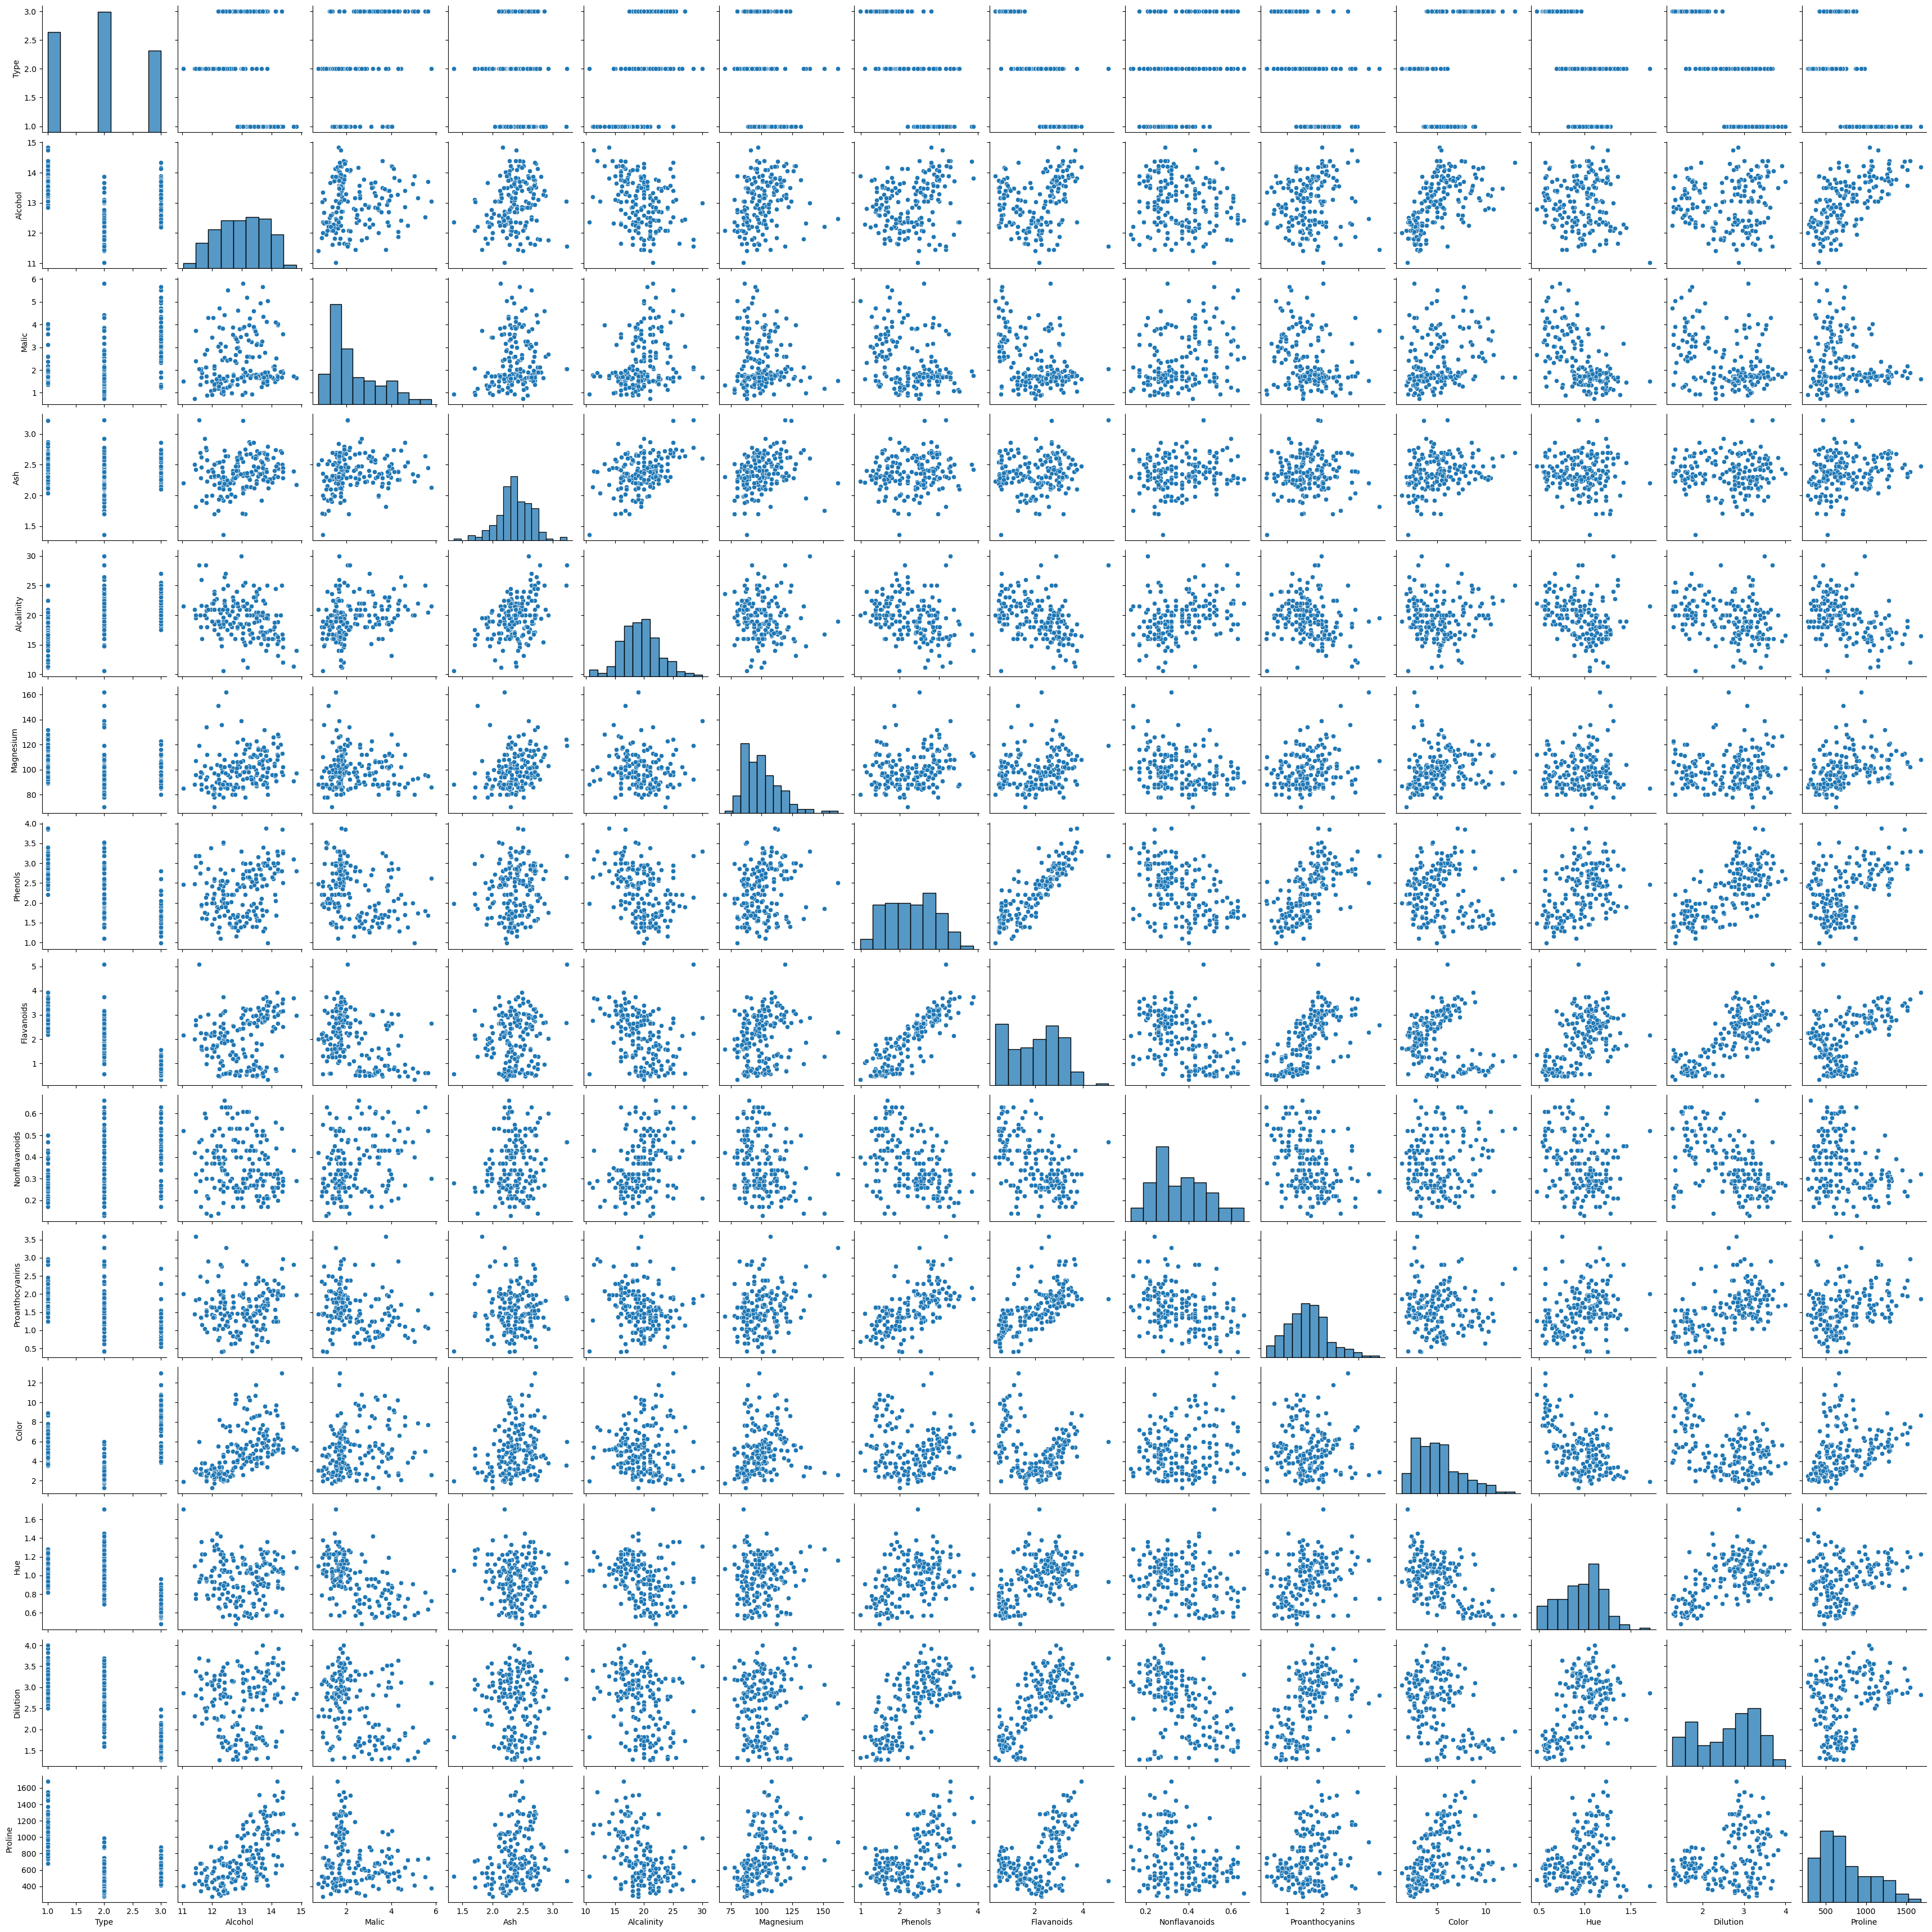

In [36]:
sns.pairplot(df)
plt.show()

- Type appears to have some distinct outliers in its distribution (diagonal plot)
- A cluster of variables related to chemical composition is observed (scatter plots)
- Ash has a relatively uniform distribution (diagonal plot), Malic has a bimodal distribution (diagonal plot)

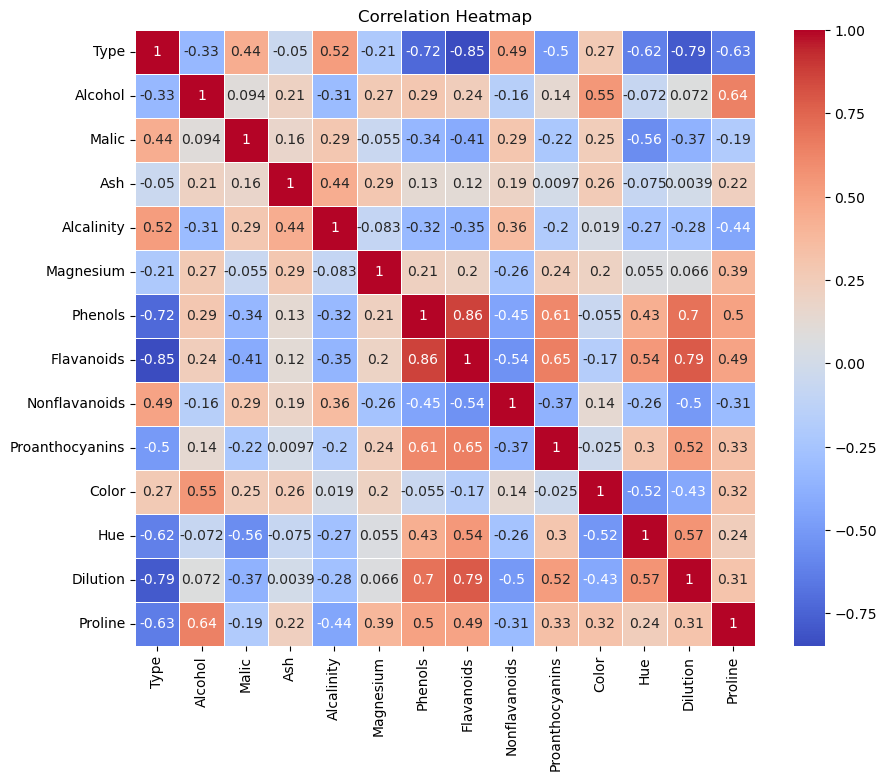

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- Phenols and Flavanoids are closely related ,Dilution and Proline have a strong negative relationship
- Alcohol and Alcalinity have a surprising positive relationship
- Magnesium has complex relationships with multiple variables
- Strong correlations suggest potential for predicting variables from others. For example, Phenols could be predicted from Flavanoids
- A cluster of variables related to color and taste is evident


### TASK 2: DIMENSIONALITY REDUCTION WITH PCA :

In [46]:
scaler = StandardScaler()
df1 = scaler.fit_transform(df)

In [54]:
pca = PCA()
pca.fit(df1)

PCA()

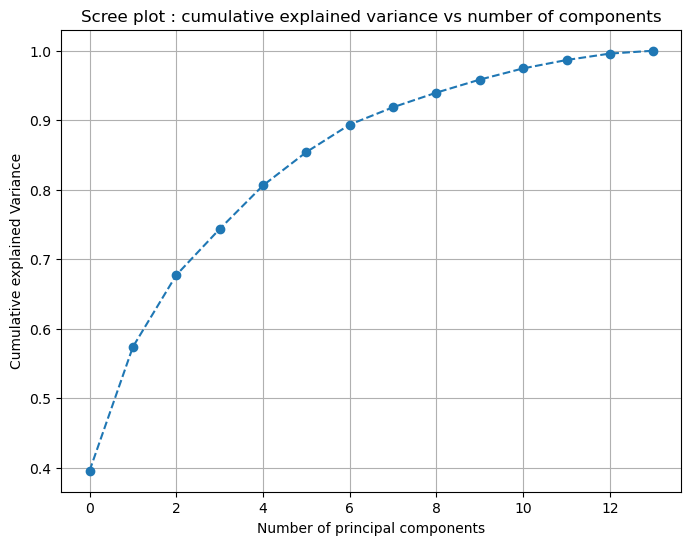

In [56]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker = 'o', linestyle='--')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained Variance')
plt.title('Scree plot : cumulative explained variance vs number of components')
plt.grid(True)
plt.show()

In [60]:
explained_variance=pca.explained_variance_ratio_
print('Explained variance Ratios : ',explained_variance)

Explained variance Ratios :  [0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615 0.01613203 0.01205691
 0.00925458 0.00412945]


### TASK 3: CLUSTERING WITH ORIGINAL DATA :

In [70]:
optimal_components = 3
pca = PCA(n_components = optimal_components)
df_pca = pca.fit_transform(df1)

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01],
       [-3.92258841e+00, -2.76821026e+00, -1.74968168e-01],
       [-1.40751111e+00, -8.67773087e-01,  2.02582949e+00],
       [-3.28812981e+00, -2.13017513e+00, -6.28992339e-01],
       [-2.75057754e+00, -1.17916999e+00, -9.77337471e-01],
       [-2.39286652e+00, -1.61128232e+00,  1.45729462e-01],
       [-2.79525633e+00, -9.23179517e-01, -1.77092548e+00],
       [-3.00559666e+00, -7.96284169e-01, -9.83741629e-01],
       [-3.67868855e+00, -1.31252342e+00, -4.21854170e-01],
       [-2.10963477e+00, -6.12981986e-01, -1.19156995e+00],
       [-2.43845636e+00, -6.78523310e-01, -8.65513701e-01],
       [-3.67349453e+00, -1.14012136e+00, -1.20376870e+00],
       [-4.44157575e+00, -2.11031917e+00, -1.26245041e+00],
       [-2.60892387e+00, -1.66641801e+00,  2.17632760e-01],
       [-2.47542846e+00, -2.33089672e+00

In [72]:
df_pca = pd.DataFrame(df_pca , columns=[f'PC{i+1}' for i in range(optimal_components)])
print(df_pca.head())

        PC1       PC2       PC3
0 -3.522934 -1.453098 -0.164795
1 -2.528858  0.330019 -2.026707
2 -2.785029 -1.036936  0.983238
3 -3.922588 -2.768210 -0.174968
4 -1.407511 -0.867773  2.025829


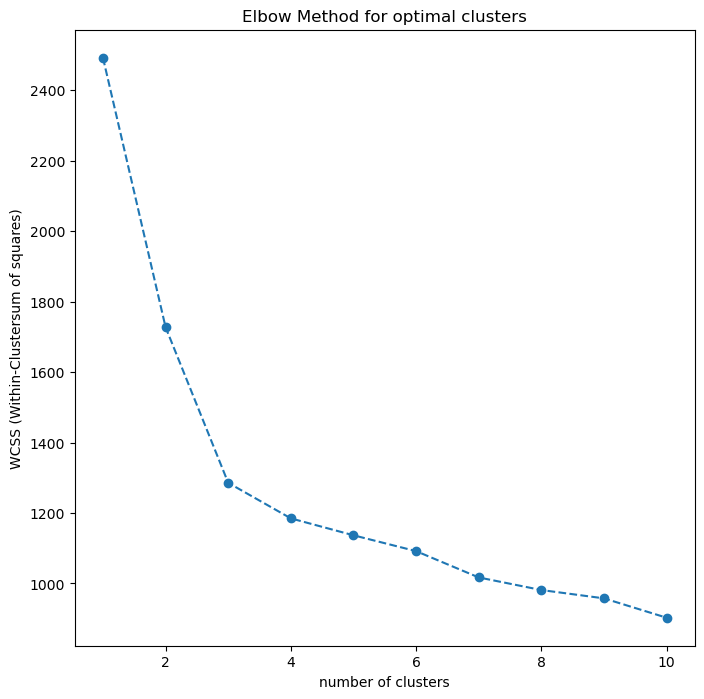

In [86]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters = i,random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range(1,11) , wcss , marker='o', linestyle='--')
plt.xlabel('number of clusters')
plt.ylabel('WCSS (Within-Clustersum of squares)')
plt.title('Elbow Method for optimal clusters')
plt.show()

In [96]:
pca = PCA(n_components=2)
clusters = kmeans.fit_predict(df1)

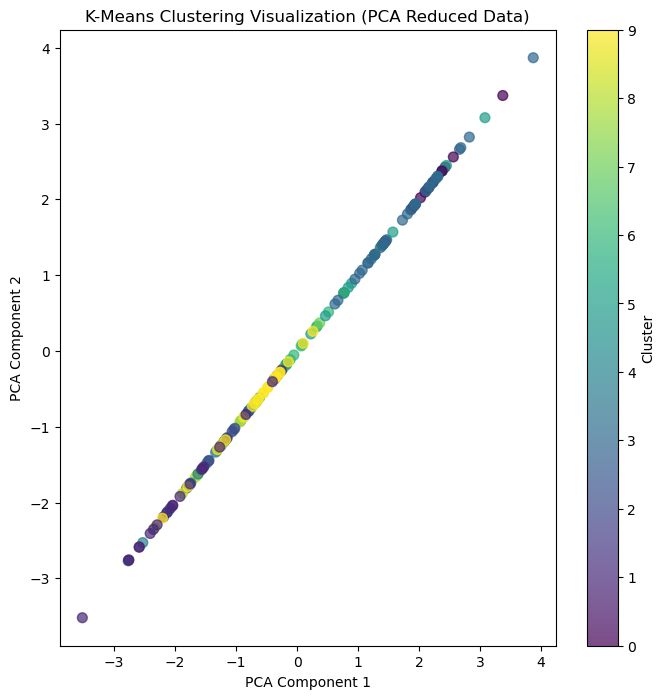

In [102]:
plt.figure(figsize=(8,8))
plt.scatter(df_pca[:,1],df_pca[:,1],c=clusters,cmap='viridis',s=50,alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization (PCA Reduced Data)')
plt.colorbar(label='Cluster')
plt.show()

In [159]:
s = silhouette_score(df1,clusters)
print(f'Silhoutte Score :{s}')

Silhoutte Score :0.12062575875733636


In [106]:
d=davies_bouldin_score(df1,clusters)
print(f'Davies-bouldin Index :{d}')

Davies-bouldin Index :1.7690713200639059


- The data might be challenging to cluster into well-defined groups.
- The clustering algorithm might not have been able to effectively separate the data points into distinct clusters.
- Further exploration of different clustering algorithms or feature engineering might be necessary to improve the clustering results.

### TASK 4: CLUSTERING WITH PCA DATA :

In [137]:
optimal_clusters = 3  
kmeans_original = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_original = kmeans_original.fit_predict(df_scaled)

In [139]:
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_pca)

In [143]:
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i + 1}' for i in range(optimal_components)])
print(df_pca.head())

        PC1       PC2       PC3
0 -3.522934 -1.453098 -0.164795
1 -2.528858  0.330019 -2.026707
2 -2.785029 -1.036936  0.983238
3 -3.922588 -2.768210 -0.174968
4 -1.407511 -0.867773  2.025829


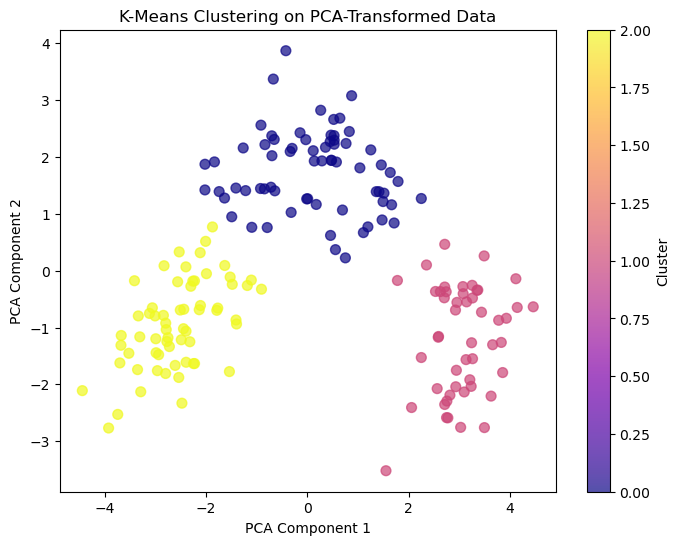

In [161]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=clusters_pca, cmap='plasma', s=50, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.colorbar(label='Cluster')
plt.show()

### TASK 5: COMPARISON AND ANALYSIS :

In [147]:
silhouette_original = silhouette_score(df1, clusters_original)
print(f'Silhouette Score (Original Data): {silhouette_original}')

Silhouette Score (Original Data): 0.30648398324833453


In [151]:
silhouette_pca = silhouette_score(df_pca, clusters_pca)
print(f'Silhouette Score (PCA-Transformed Data): {silhouette_pca}')

Silhouette Score (PCA-Transformed Data): 0.4881750664935789


In [155]:
davies_bouldin_original = davies_bouldin_score(df1, clusters_original)
print(f'Davies–Bouldin Index (Original Data): {davies_bouldin_original}')

Davies–Bouldin Index (Original Data): 1.315707552261773


In [157]:
davies_bouldin_pca = davies_bouldin_score(df_pca, clusters_pca)
print(f'Davies–Bouldin Index (PCA-Transformed Data): {davies_bouldin_pca}')

Davies–Bouldin Index (PCA-Transformed Data): 0.7747314050329885


- The PCA transformation has improved the clustering quality of your data:
- Clustering with PCA resulted in higher silhouette scores, indicating better-defined clusters.
- The Davies–Bouldin Index also showed improvement, reflecting greater separation between clusters.

### TASK 6: CONCLUSION AND INSIGHTS :

#### (i) Summarize the key findings and insights from the assignment :

 * The dataset includes variables like phenols, flavonoids, alcohol, and acidity that are essential in determining the quality of the wine. By analyzing these features, we can predict or classify the quality of different wines

* Phenols and flavonoids are compounds that affect the color, taste, and mouthfeel of wine. Understanding their relationship helps winemakers adjust the winemaking process to enhance flavor and quality

* The various chemical components (like malic acid, ash, magnesium) can indicate the health of the grapes, fermentation process, and aging potential. Analyzing these can help improve production techniques

#### (ii) Practical Implications of Using PCA and Clustering :

* Using PCA (a way to simplify data) before K-Means clustering led to clearer clusters. The score showing how well the clusters were defined improved from 0.306 (original data) to 0.488 (PCA data)

* The clusters were more separated in the PCA-transformed data, making it easier to tell them apart

#### (iii)Recommendations for Using PCA and Clustering :

- When to Use PCA :
  - Use PCA when you have many features and want to reduce dimensionality for easier visualization or analysis, especially if some features are correlated or redundant. It helps simplify data, which can enhance clustering results.
- When to Use Clustering :
  - Use clustering when you want to find groups or patterns in your data, understand relationships between observations, or identify outliers. A combined approach of using PCA before clustering is usually beneficial for better results.